In [146]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
sns.set()

## Importing the Dataset 

In [147]:
#from row 20 there are no values
real_estate_df = pd.read_csv("Real_estate_Tel_Aviv_20_years.csv",usecols = range(0,21))
real_estate_df

,subLot,lot,bloc,transactionDate,street,houseNumber,apartmentNumber,price,grossArea,netArea,...,ppsm,ppr,floor,floors,apartmentsInBuilding,parking,storage,roof,yard,constructionYear
0,5,814,6628,01/12/2020,1,9,5.0,4636021,118.0,118,...,39288.0,1159005.0,1.0,20.0,66.0,0.0,0.0,0.0,0.0,2019
1,0,814,6628,29/10/2020,1,5,5.0,4559044,118.0,118,...,38636.0,1139761.0,1.0,17.0,66.0,0.0,0.0,0.0,0.0,2019
2,48,640,6628,15/06/2020,1,48,48.0,7350000,196.0,196,...,37500.0,1470000.0,12.0,13.0,48.0,4.0,0.0,63.0,0.0,1996
3,0,14,6107,10/04/2018,2,1,0.0,3355000,145.0,145,...,23138.0,838750.0,29.0,42.0,177.0,0.0,0.0,0.0,0.0,2018
4,106,14,6107,04/04/2018,2,2,0.0,2720360,144.0,144,...,18891.0,544072.0,6.0,42.0,177.0,0.0,0.0,0.0,0.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,10,42,7016,25/08/2003,909,23,NaN,360000,NaN,50,...,7200.0,180000.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,1950
5897,8,33,7016,01/12/2011,909,17,NaN,1944160,NaN,118,...,16476.0,1944160.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1935
5898,9,33,7016,01/12/2011,909,17,NaN,689040,NaN,38,...,18133.0,689040.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1935
5899,7,33,7016,01/12/2011,909,17,NaN,2253880,NaN,171,...,13181.0,2253880.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1935


## Task 1: Cleaning the dataset 

### Checking the shape of DataFrame

In [148]:
print('Number of row are',real_estate_df.shape[0], 'Number of columns are', real_estate_df.shape[1])

Number of row are 5901 Number of columns are 21


### Checking for null values

In [149]:
dict={}
for i in list(real_estate_df.columns):
    dict[i]=real_estate_df[i].isnull().sum()
pd.DataFrame(dict,index=['Number of null values']).transpose()

,Number of null values
subLot,0
lot,0
bloc,0
transactionDate,0
street,0
houseNumber,0
apartmentNumber,2538
price,0
grossArea,1243
netArea,604


### Fill in the Nan Values with 0

In [150]:
# All the nan values are empty cells
real_estate_df =real_estate_df.fillna(0)

### Rename first column

In [151]:
col_str =[]
for col_i in real_estate_df.columns:
    col_i = re.sub(r"(\w)([A-Z])", r"\1 \2", col_i).title()
    col_i = col_i.replace(" ","_")
    col_str.append(col_i)
real_estate_df.columns = col_str
real_estate_df.columns


Index(['Sub_Lot', 'Lot', 'Bloc', 'Transaction_Date', 'Street', 'House_Number',
       'Apartment_Number', 'Price', 'Gross_Area', 'Net_Area', 'Rooms', 'Ppsm',
       'Ppr', 'Floor', 'Floors', 'Apartments_In_Building', 'Parking',
       'Storage', 'Roof', 'Yard', 'Construction_Year'],
      dtype='object')

In [152]:
real_estate_df["Counter"] = 1

### Checking For datatypes of the attributes

In [153]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sub_Lot                 5901 non-null   int64  
 1   Lot                     5901 non-null   int64  
 2   Bloc                    5901 non-null   int64  
 3   Transaction_Date        5901 non-null   object 
 4   Street                  5901 non-null   int64  
 5   House_Number            5901 non-null   int64  
 6   Apartment_Number        5901 non-null   float64
 7   Price                   5901 non-null   int64  
 8   Gross_Area              5901 non-null   float64
 9   Net_Area                5901 non-null   object 
 10  Rooms                   5901 non-null   float64
 11  Ppsm                    5901 non-null   float64
 12  Ppr                     5901 non-null   float64
 13  Floor                   5901 non-null   float64
 14  Floors                  5901 non-null   

### Insert new columns

In [154]:
# insert Year column
real_estate_df.insert(4, "Year", real_estate_df["Transaction_Date"].apply(lambda x: x.split('/')[2]))

In [155]:
# insert Mean Area column
Area_slice = real_estate_df.loc[: ,'Gross_Area': 'Net_Area']
real_estate_df.insert(10, 'Mean_Area', Area_slice.mean(axis=1).astype('int'))

C:\Users\user\AppData\Local\Temp/ipykernel_2444/424131486.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  real_estate_df.insert(10, 'Mean_Area', Area_slice.mean(axis=1).astype('int'))


### Convert columns to the correct type

In [156]:
col_to_int = ['Year','Apartment_Number','Gross_Area','Ppsm', 'Floor', 'Floors', 'Apartments_In_Building',
              'Parking','Rooms', 'Roof', 'Yard', 'Construction_Year']
for i in col_to_int:
    real_estate_df[i] = real_estate_df[f'{i}'].astype(int)
    

In [157]:
#Fix specifc cell string error
# real_estate_df['Net_Area'][3484] = '37471'
# # Change the column to int
# real_estate_df['Net_Area'] = real_estate_df['Net_Area'].astype(int)

In [158]:
#Fix specifc cell string error
# real_estate_df['Gross_Area'][323] = int('33')
# real_estate_df['Gross_Area'] = real_estate_df['Gross_Area'].astype(int)

### Completing empty values in GrossArea & NetArea

In [159]:
# completing rows according to the neighbor if equal to zero for GrossArea & NetArea
df_temp = real_estate_df.loc[:]

i=0
while i != len(df_temp) : 
    if df_temp['Gross_Area'][i] == 0 or df_temp['Gross_Area'][i] == '0':
        df_temp['Gross_Area'][i] = int(df_temp['Net_Area'][i])
    
    if df_temp['Net_Area'][i] == 0 or df_temp['Net_Area'][i] == '0' :
        df_temp['Net_Area'][i] = int(df_temp['Gross_Area'][i] )
    i+=1


C:\Users\user\AppData\Local\Temp/ipykernel_2444/331930690.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Gross_Area'][i] = int(df_temp['Net_Area'][i])
C:\Users\user\AppData\Local\Temp/ipykernel_2444/331930690.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Net_Area'][i] = int(df_temp['Gross_Area'][i] )


In [160]:
# Appling changes to main DataFram
real_estate_df = df_temp

### Deleting unnecessary columns

In [161]:
del real_estate_df["Storage"]
del real_estate_df["Street"]
del real_estate_df["House_Number"]
del real_estate_df["Apartment_Number"]

In [162]:
dict={}
for i in list(real_estate_df.columns):
    dict[i]=real_estate_df[i].isnull().sum()
pd.DataFrame(dict,index=['Number of null values']).transpose()

,Number of null values
Sub_Lot,0
Lot,0
Bloc,0
Transaction_Date,0
Year,0
Price,0
Gross_Area,0
Mean_Area,0
Net_Area,0
Rooms,0


### Deleting all zero values in Rooms, Ppsm & Ppr colums

In [163]:
# Deleting all zero values in rooms column - zero rooms in appartment is not exist
real_estate_df = real_estate_df[real_estate_df['Rooms'] != 0]   
real_estate_df = real_estate_df[real_estate_df['Ppsm'] != 0]   
real_estate_df = real_estate_df[real_estate_df['Ppr'] != 0] 

## Task 2: Checking statistical data

In [164]:
real_estate_df[real_estate_df.columns].describe().transpose().astype('int')

,count,mean,std,min,25%,50%,75%,max
Sub_Lot,5892,24,62,-15,1,7,20,921
Lot,5892,164,241,1,25,66,183,3020
Bloc,5892,6925,546,6106,6649,6962,7075,9032
Year,5892,2013,4,2002,2012,2015,2018,2021
Price,5892,2257142,2430112,0,938731,1725000,2815327,44550000
Gross_Area,5892,78,44,1,52,68,94,999
Mean_Area,5892,53,53,0,0,53,80,540
Rooms,5892,3,1,1,2,3,4,14
Ppsm,5892,43763,443794,1,15907,25882,38000,30829107
Ppr,5892,711252,724552,4,363566,600000,916666,30829107


### Usefull information about the data

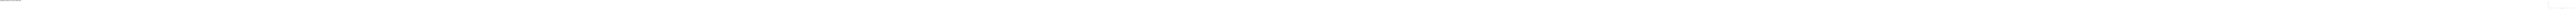

In [165]:
fig = plt.subplots(figsize=(12, 36))
plt.subplot(10, 1, 1)
plt.text(2,550,"RealEstate Sold Over The Years 2002-2021",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
sns.histplot(x = real_estate_df['Year'].sort_values(), kde=True)
# plt.tight_layout()
plt.show()

In [166]:
real_estate_df.head()

,Sub_Lot,Lot,Bloc,Transaction_Date,Year,Price,Gross_Area,Mean_Area,Net_Area,Rooms,Ppsm,Ppr,Floor,Floors,Apartments_In_Building,Parking,Roof,Yard,Construction_Year,Counter
0,5,814,6628,01/12/2020,2020,4636021,118,118,118,4,39288,1159005.0,1,20,66,0,0,0,2019,1
1,0,814,6628,29/10/2020,2020,4559044,118,118,118,4,38636,1139761.0,1,17,66,0,0,0,2019,1
2,48,640,6628,15/06/2020,2020,7350000,196,196,196,5,37500,1470000.0,12,13,48,4,63,0,1996,1
3,0,14,6107,10/04/2018,2018,3355000,145,145,145,4,23138,838750.0,29,42,177,0,0,0,2018,1
4,106,14,6107,04/04/2018,2018,2720360,144,144,144,5,18891,544072.0,6,42,177,0,0,0,2018,1


# Question 1: What is the trend of the real estate market in Tel Aviv? 

Text(0.5, 1.0, 'Largest Areas')

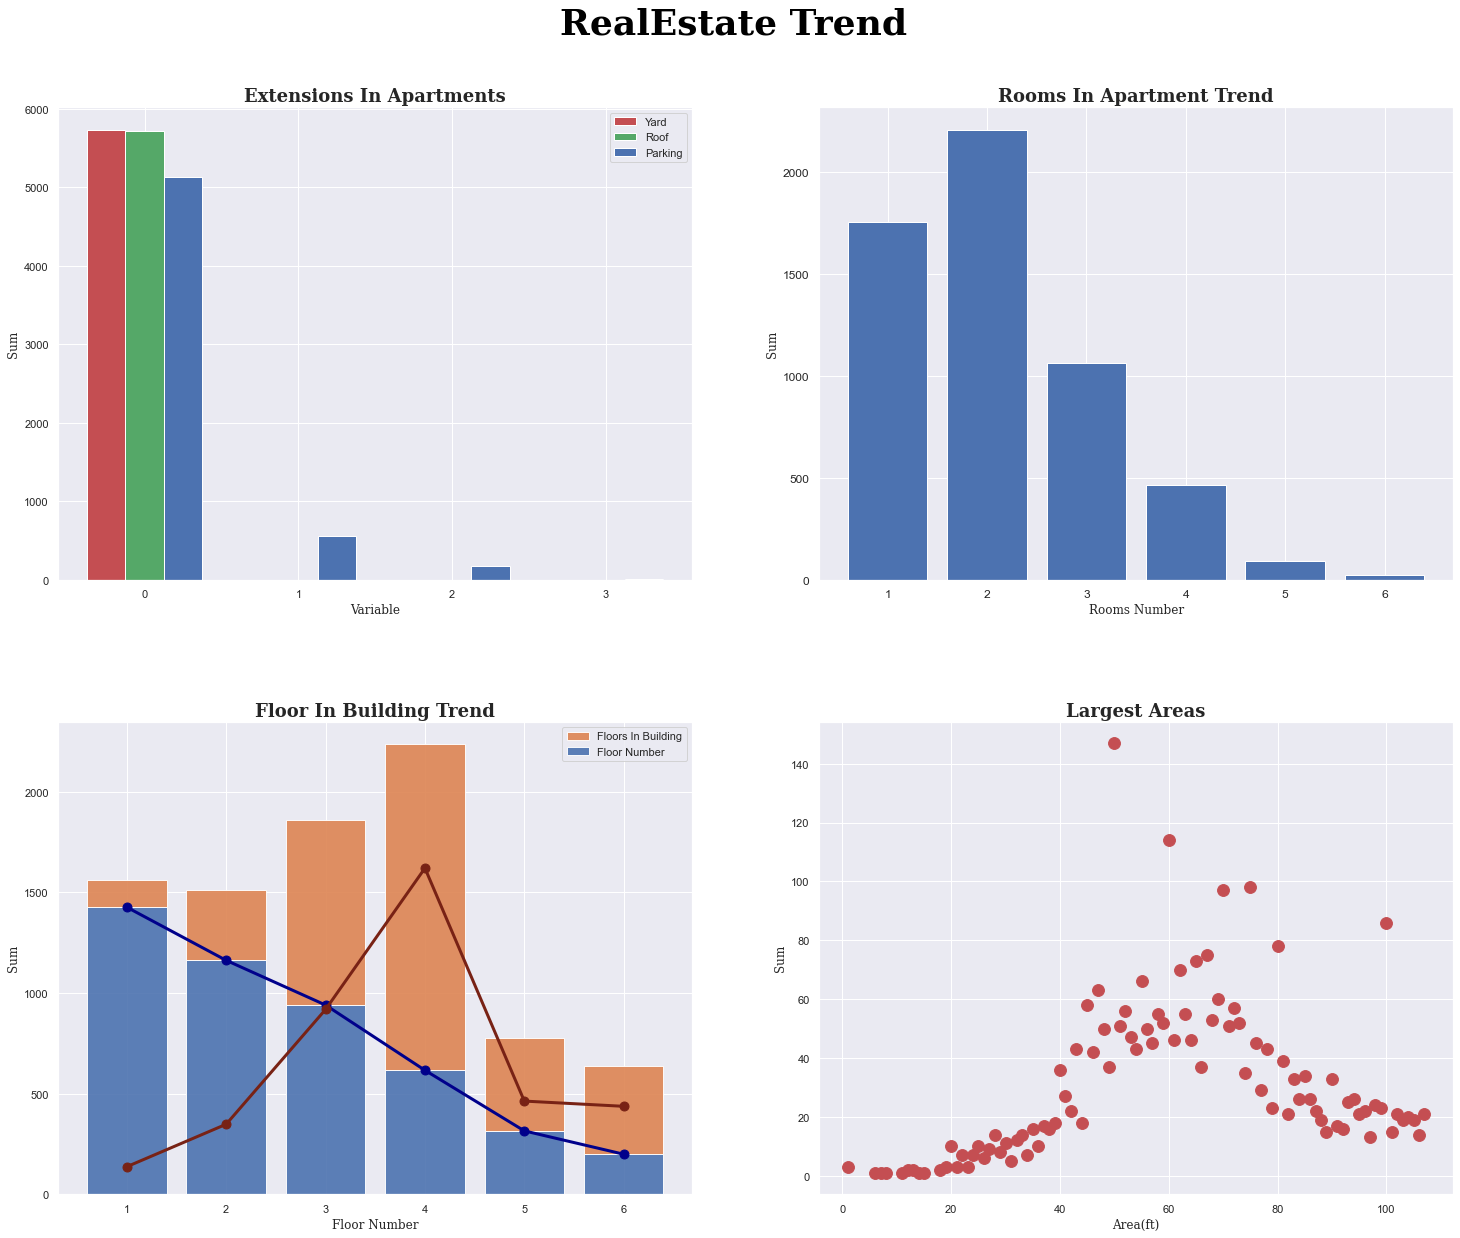

In [167]:
plt.figure(figsize = (25,20))
plt.subplots_adjust(hspace=0.3)
plt.suptitle("RealEstate Trend",x = 0.5, y = 0.95,fontsize=36, fontweight='bold', fontfamily='serif', color="#000000")

plt.subplot(2,2,1)

########### First


y1 = real_estate_df.groupby('Yard').sum()['Counter'][:4] # most of the real estate in tlv with no yard
y2 = real_estate_df.groupby('Roof').sum()['Counter'][:4] # most of the real estate in tlv with no roof
y3 = real_estate_df.groupby('Parking').sum()['Counter'][:4] # most of the real estate in tlv with no parking

N = 4
ind = np.arange(N) 
width = 0.25

bar1 = plt.bar(ind, y1, width, color = 'r')
bar2 = plt.bar(ind+width, y2, width, color='g')
bar3 = plt.bar(ind+width*2, y3, width, color = 'b')
  
plt.xlabel("Variable",fontsize=12, fontfamily='serif')
plt.ylabel('Sum',fontsize=12, fontfamily='serif')
plt.title("Extensions In Apartments",fontsize=18, fontweight='bold', fontfamily='serif' )
  
plt.xticks(ind+width, range(0,4))
plt.legend( (bar1, bar2, bar3), ('Yard', 'Roof', 'Parking') )

########### Second
plt.subplot(2,2,2)

plt.title("Rooms In Apartment Trend",fontsize=18, fontweight='bold', fontfamily='serif' )

plt.xlabel("Rooms Number",fontsize=12, fontfamily='serif')
plt.ylabel('Sum',fontsize=12, fontfamily='serif')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.bar(range(1,7) ,real_estate_df.groupby('Rooms').sum()['Counter'][1:7] )

########### Third
floor = real_estate_df.groupby('Floor').sum()['Counter'][1:7]
in_building = real_estate_df.groupby('Floors').sum()['Counter'][1:7]

plt.subplot(2,2,3)

floor = real_estate_df.groupby('Floor').sum()['Counter'][1:7]
in_building = real_estate_df.groupby('Floors').sum()['Counter'][1:7]

p1 = plt.bar(range(1,7) ,floor, alpha=0.9)
p2 = plt.bar( range(1,7) ,in_building,alpha=0.9, bottom = floor)

plt.xlabel("Floor Number",fontsize=12, fontfamily='serif')
plt.ylabel('Sum',fontsize=12, fontfamily='serif')

plt.title("Floor In Building Trend",fontsize=18, fontweight='bold', fontfamily='serif' )

plt.plot(range(1,7) ,floor, color = "darkblue", marker = "o",
         linestyle= "-", linewidth = 3,markersize = 9)
plt.plot(range(1,7) ,in_building, color = "#782215", marker = "o",
         linestyle= "-", linewidth = 3,markersize = 9)
plt.legend((p2[0], p1[0]), ('Floors In Building', 'Floor Number'))

########## Fourth
plt.subplot(2,2,4)

newarea = real_estate_df.groupby('Mean_Area', sort = True).sum()['Counter'][1:100]
newarea = newarea.sort_index(axis=0)
newarea_index = list(newarea.index.values) 

plt.scatter(newarea_index, newarea, color='r', s = 140)
plt.xlabel('Area(ft)',fontsize=12, fontfamily='serif')
plt.ylabel('Sum',fontsize=12, fontfamily='serif')
plt.title('Largest Areas',fontsize=18, fontweight='bold', fontfamily='serif' )


### From the analysis couple conclusions:
> - Most apartments dont have Extensions
> - Most apartments are 3 or 4 floors in buliding
> - Most apartments have 3 rooms in floor
> - Most common apartment size is between 40 - 85 (ft)

# Question 2: What are the features that most influence the price of the apartment?

### Correlation matrix of continuous features

In [168]:
df_corr=real_estate_df[real_estate_df.columns].corr()

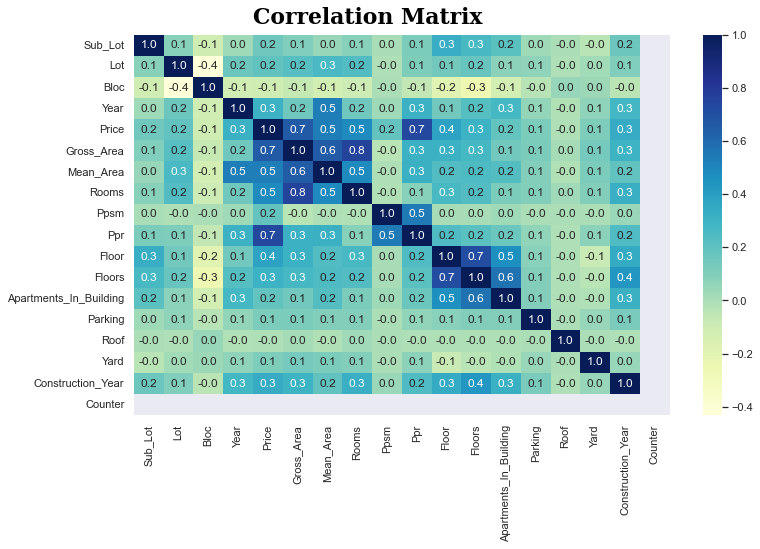

In [169]:
fig=plt.figure(figsize=(12,7))
gs=fig.add_gridspec(1,1)
ax0=fig.add_subplot(gs[0,0])
ax0.text(4,-0.5,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(df_corr,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

### Conclusion From the Correlaction 
#### feature that influence the most:
> - __Gross Area__
> -__Rooms__

###### Another component is the Bloc(Area) inside the city. The Location is the main key to the price


### Bloc Component 


In [170]:
top_expensive = real_estate_df.groupby('Bloc').mean()['Price'].astype('int').nlargest(n=7)
top_expensive = top_expensive.drop(8991)

In [171]:
top_expensive_attribute = ['Glilot','Sarona Market','Neve Zedek','Neot Afeka',
                           'Dizengoff Center','Nahalat Binyamin']

## To find each location i used the Bloc & Lot in the israel goverment map website
## https://www.govmap.gov.il/

In [172]:
# Most Rich Areas in TLV 
top_areas_df = pd.DataFrame()
top_areas_df.insert(0, 'Bloc', top_expensive.index)
top_areas_df.insert(1, 'Area In TLV', top_expensive_attribute)
top_areas_df.insert(2, 'Mean Price', list(top_expensive))
top_areas_df.style.hide_index()


Bloc,Area In TLV,Mean Price
7224,Glilot,12600000
7101,Sarona Market,12328772
6926,Neve Zedek,11090000
6336,Neot Afeka,10948000
7091,Dizengoff Center,9514454
6937,Nahalat Binyamin,9052455


### Conclusion: The most influencing attributes(by order):
> - __Location__
> - __Gross Area__
> - __Rooms__
<br>
###### Another component is Construction Year & Floor

In [173]:
# Top blocs in Tel Aviv DataFrame
top_expensive_df = pd.DataFrame()
for bloc in top_expensive.index:
    top_expensive_df = top_expensive_df.append(real_estate_df.loc[real_estate_df['Bloc'] == bloc])
top_expensive_df.head()

,Sub_Lot,Lot,Bloc,Transaction_Date,Year,Price,Gross_Area,Mean_Area,Net_Area,Rooms,Ppsm,Ppr,Floor,Floors,Apartments_In_Building,Parking,Roof,Yard,Construction_Year,Counter
3129,121,9,7224,07/12/2016,2016,15000000,140,0,140,5,107143,3000000.0,1,13,0,0,0,0,2019,1
5181,0,9,7224,04/03/2018,2018,10200000,298,298,286,4,35664,2550000.0,0,13,49,2,0,0,2016,1
442,2,9,7101,12/03/2018,2018,3699999,43,43,43,3,86046,1233333.0,4,30,120,2,0,0,2015,1
443,105,11,7101,14/12/2017,2017,20916305,437,437,437,5,47863,4183261.0,30,31,108,0,0,0,2010,1
444,106,10,7101,14/12/2017,2017,12370014,223,223,223,4,55471,3092503.5,30,31,108,0,0,0,2011,1


In [174]:
new_df = pd.DataFrame()
for i in new_df.index:
    new_df = new_df.append(real_estate_df.loc[real_estate_df['Floors'] == 4])
new_df.head()

""


# Question 3: Given a certain area of land in Tel Aviv - what is the effective combination in terms of planning and construction (floor, yard, roof, parking) to maximize the price of the property?

> __The data is from 2012-2022 (modern needs)__

In [175]:
modern_df = real_estate_df

In [176]:
del modern_df["Transaction_Date"]
del modern_df["Net_Area"]


In [177]:
modern_df= modern_df.where(modern_df.Year > 2012)
modern_df.dropna()

,Sub_Lot,Lot,Bloc,Year,Price,Gross_Area,Mean_Area,Rooms,Ppsm,Ppr,Floor,Floors,Apartments_In_Building,Parking,Roof,Yard,Construction_Year,Counter
0,5.0,814.0,6628.0,2020.0,4636021.0,118.0,118.0,4.0,39288.0,1159005.00,1.0,20.0,66.0,0.0,0.0,0.0,2019.0,1.0
1,0.0,814.0,6628.0,2020.0,4559044.0,118.0,118.0,4.0,38636.0,1139761.00,1.0,17.0,66.0,0.0,0.0,0.0,2019.0,1.0
2,48.0,640.0,6628.0,2020.0,7350000.0,196.0,196.0,5.0,37500.0,1470000.00,12.0,13.0,48.0,4.0,63.0,0.0,1996.0,1.0
3,0.0,14.0,6107.0,2018.0,3355000.0,145.0,145.0,4.0,23138.0,838750.00,29.0,42.0,177.0,0.0,0.0,0.0,2018.0,1.0
4,106.0,14.0,6107.0,2018.0,2720360.0,144.0,144.0,5.0,18891.0,544072.00,6.0,42.0,177.0,0.0,0.0,0.0,2018.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5887,0.0,20.0,9012.0,2014.0,1300000.0,126.0,126.0,4.0,10317.0,325000.00,1.0,4.0,0.0,0.0,0.0,0.0,1970.0,1.0
5888,0.0,20.0,9012.0,2014.0,2340000.0,84.0,84.0,2.0,28193.0,1170000.00,1.0,2.0,0.0,0.0,0.0,0.0,1970.0,1.0
5889,0.0,20.0,9012.0,2014.0,2340000.0,84.0,84.0,2.0,28193.0,1170000.00,1.0,2.0,0.0,0.0,0.0,0.0,1970.0,1.0
5890,2.0,29.0,9013.0,2020.0,852382.0,115.0,115.0,4.0,7412.0,213096.00,1.0,4.0,5.0,0.0,0.0,0.0,1940.0,1.0


In [178]:
modern_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5892 entries, 0 to 5900
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sub_Lot                 3986 non-null   float64
 1   Lot                     3986 non-null   float64
 2   Bloc                    3986 non-null   float64
 3   Year                    3986 non-null   float64
 4   Price                   3986 non-null   float64
 5   Gross_Area              3986 non-null   float64
 6   Mean_Area               3986 non-null   float64
 7   Rooms                   3986 non-null   float64
 8   Ppsm                    3986 non-null   float64
 9   Ppr                     3986 non-null   float64
 10  Floor                   3986 non-null   float64
 11  Floors                  3986 non-null   float64
 12  Apartments_In_Building  3986 non-null   float64
 13  Parking                 3986 non-null   float64
 14  Roof                    3986 non-null   

<BarContainer object of 71 artists>

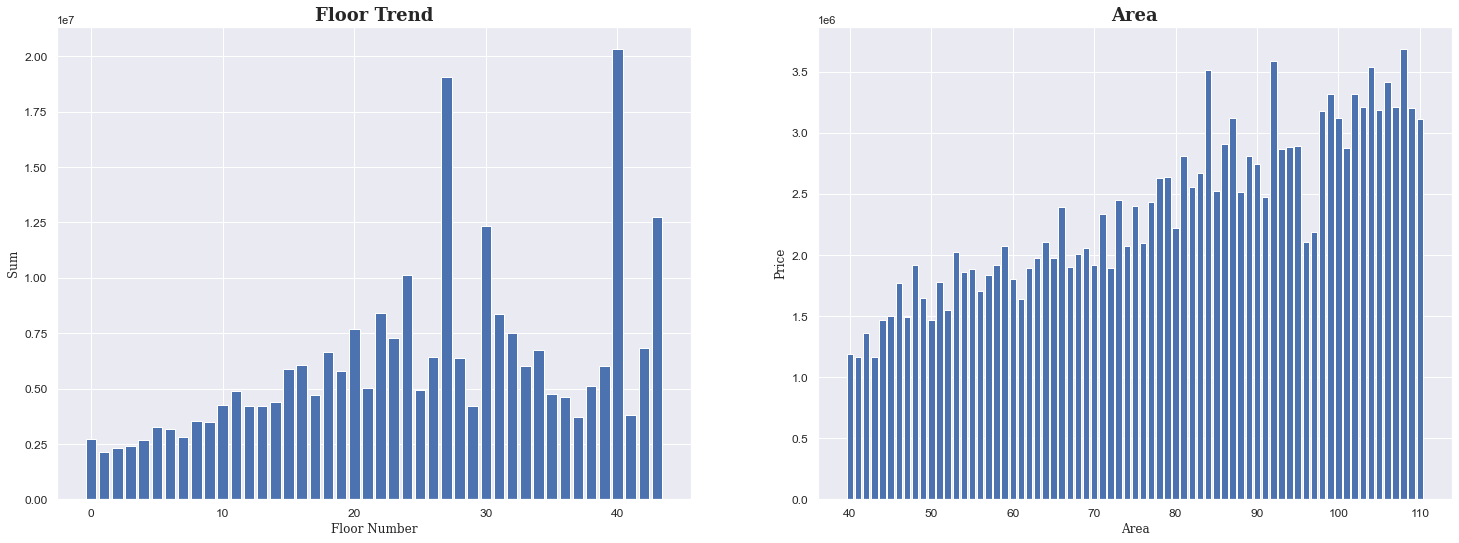

In [179]:
plt.figure(figsize = (25,20))
plt.subplots_adjust(hspace=0.3)

plt.subplot(2,2,1)
########### First

plt.title("Floor Trend",fontsize=18, fontweight='bold', fontfamily='serif' )

plt.xlabel("Floor Number",fontsize=12, fontfamily='serif')
plt.ylabel('Sum',fontsize=12, fontfamily='serif')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.bar(range(0,44) ,modern_df.groupby('Floor').mean()['Price'].astype(int) )

########### Second
plt.subplot(2,2,2)

plt.title("Area",fontsize=18, fontweight='bold', fontfamily='serif' )

plt.xlabel("Area",fontsize=12, fontfamily='serif')
plt.ylabel('Price',fontsize=12, fontfamily='serif')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.bar(range(40,111) ,modern_df.groupby('Mean_Area').mean()['Price'][40:110].astype(int))



## Consequenses:

###  Floor:
#### The Highest the more Expensive 
> - From the 9 floor major price upsale

### Yard:
#### No change
> - The price is consistent to the area range  
> - In unequivocal there is no specific ft range that is more expensive 


### Parking:
#### Ideal is to build 1 - 3 Parking lots
> - Basic parking area size is 12.5 meters
> - Price-to-constructur: 120k - 220k ILS
> - Price-to-buyer: 150k - 300k ILS
> - Parking is a MUST, tenants dont buy house with no parking zone

#### info from:
[site 1](https://bit.ly/3NnagiP) <br>
[site 2](https://bit.ly/3iWJBLT)